In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
diabetes_df = pd.read_csv('diabetes2.csv')

In [44]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We need to clean the data as there are some errors in the dataset that is: the minimum Blood pressure, skin thickness, Insulin is 0 and these values cannot be Zero


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

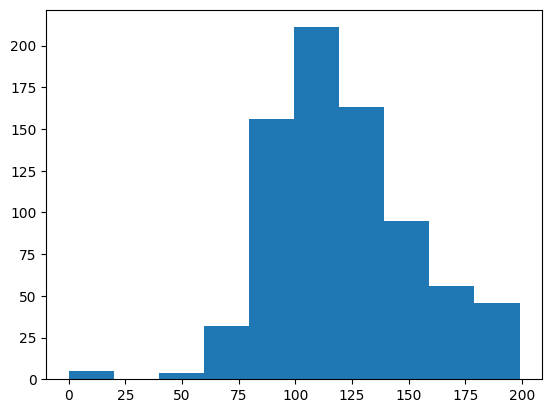

In [46]:
plt.hist(diabetes_df['Glucose'])
# to check the skewness

In [47]:
diabetes_df['Glucose'].mean()

120.89453125

In [48]:
diabetes_df['Glucose'].median()

117.0

If mean and median are close, we consider it to be normally distributed
Now, we will replace the 0 values with mean, as we are assuming that the data is normally distributed.

In [49]:
diabetes_df['Glucose'] = diabetes_df['Glucose'].replace(0,(diabetes_df['Glucose'].mean()))
diabetes_df['BMI'] = diabetes_df['BMI'].replace(0,(diabetes_df['BMI'].mean()))
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].replace(0,(diabetes_df['BloodPressure'].mean()))
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0,(diabetes_df['SkinThickness'].mean()))
diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(0,(diabetes_df['Insulin'].mean()))

In [50]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now our data is clean as the records with values 0 have been replaced.


In [51]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

This kind of dataset is called imbalance dataset because one category is more prominent(has more values) than another category.

<Axes: >

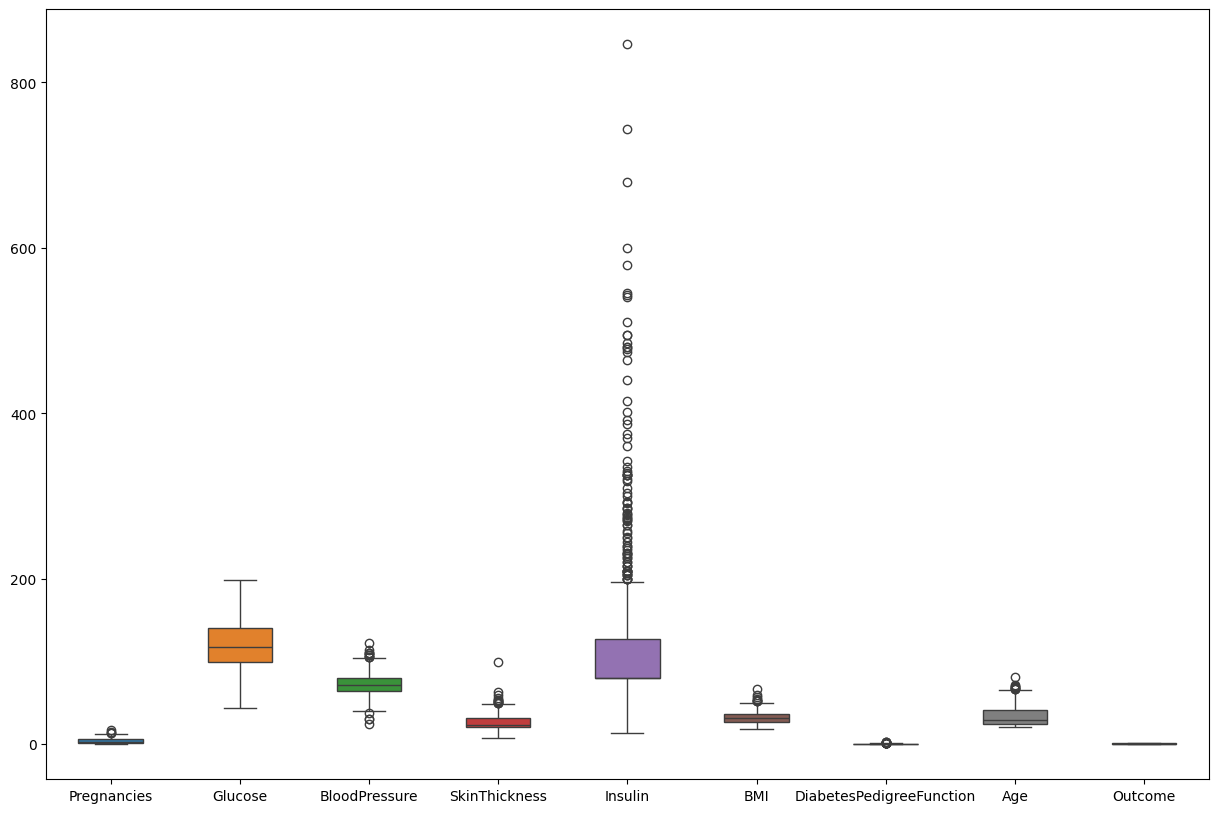

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes_df, ax=ax, width = 0.5, fliersize=6) #fliersize is the size of circle

In [53]:
# Now we will over sample the minority Class to balance the dataset
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=24)

In [55]:
# split the df into input and output

X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

In [56]:
#Check the shape before oversampling
X.shape, y.shape

((768, 8), (768,))

In [57]:
X.sm,y.sm = smote.fit_resample(X,y) # oversampling using Smote

<ipython-input-57-c1f5fb987026>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.sm,y.sm = smote.fit_resample(X,y) # oversampling using Smote


In [59]:
X.sm.shape, y.sm.shape

((1000, 8), (1000,))

In [60]:
y.sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

Now our dataset is perfectly balanced as both the outcomes have equal resords

In [97]:
# split the data into train and tezt
X_train, X_test, y_train, y_test = train_test_split(X.sm, y.sm, test_size=0.22, random_state=63)

In [98]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [99]:
X_tr_sc = scale.fit_transform(X_train)
X_tes_sc = scale.transform(X_test)

In [100]:
model = LogisticRegression()

In [101]:
model.fit(X_tr_sc, y_train)

LogisticRegression()

In [102]:
model.predict_proba(X_tes_sc)

array([[0.90542195, 0.09457805],
       [0.57131899, 0.42868101],
       [0.19187059, 0.80812941],
       [0.10439381, 0.89560619],
       [0.97049942, 0.02950058],
       [0.03746544, 0.96253456],
       [0.71374297, 0.28625703],
       [0.93452008, 0.06547992],
       [0.92689456, 0.07310544],
       [0.83493859, 0.16506141],
       [0.06526535, 0.93473465],
       [0.91519111, 0.08480889],
       [0.40603399, 0.59396601],
       [0.45598425, 0.54401575],
       [0.70532549, 0.29467451],
       [0.58671951, 0.41328049],
       [0.85907063, 0.14092937],
       [0.68315799, 0.31684201],
       [0.95172218, 0.04827782],
       [0.78073163, 0.21926837],
       [0.88459405, 0.11540595],
       [0.16249573, 0.83750427],
       [0.96891918, 0.03108082],
       [0.60978327, 0.39021673],
       [0.75946056, 0.24053944],
       [0.42192088, 0.57807912],
       [0.84131213, 0.15868787],
       [0.89125704, 0.10874296],
       [0.6618867 , 0.3381133 ],
       [0.45740013, 0.54259987],
       [0.

In [103]:
y_pred=model.predict(X_tes_sc)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score, roc_auc_score

In [105]:
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))
print("ROC AUC Score:", roc_auc_score(y_test,y_pred))

accuracy_score 0.7318181818181818
precision_score 0.7184466019417476
recall_score 0.7115384615384616
f1_score 0.7149758454106281
ROC AUC Score: 0.7307692307692308


In [106]:
print("classification_report",classification_report(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))

classification_report               precision    recall  f1-score   support

           0       0.74      0.75      0.75       116
           1       0.72      0.71      0.71       104

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220

confusion_matrix [[87 29]
 [30 74]]


In [117]:
# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature':X.columns , 'Coefficient': model.coef_[0]})



In [118]:
coefficients_df

,Feature,Coefficient
0,Pregnancies,0.488326
1,Glucose,1.214805
2,BloodPressure,-0.123333
3,SkinThickness,-0.019983
4,Insulin,-0.103296
5,BMI,0.656297
6,DiabetesPedigreeFunction,0.358419
7,Age,0.110012


These coefficients represent the change in the log-odds of the outcome (diabetes) for a one-unit change in the corresponding feature, holding all other features constant.